# Ex02 - Histogram and Feature Extraction

This activity has 2 main objectives:
   - understand the concept of histogram and image statistics
   - explore different ways of extracting features from histograms and their application to a classification problem.

## Part 1 - Histogram

Study the concept of histogram and the use of the *np.histogram* function. Also try to understand the following function which plots the histogram using bar chart. This function will be very useful in the exercises on this notebook.

In [ ]:
def plota_hist(h,cor,nbins,bin_edges):

    w=255./nbins
    bin_centers = bin_edges[1:]-(w/2)
    plt.bar(bin_centers, h, width=w, color=cor)
    #plt.title('Image histogram: %s bins' % (nbins))

### Exercise 2.1.1

Let's try to calculate the histogram of color images. Use the 2 images from the shared folder **Ex02_images/1** and plot the histograms for each of the bands using bar graphs. Visually compare the histograms and comment on the main differences. If you had to say which histograms belong to which of 2 images, would you be able to get it right? Explain why.


In [ ]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
import os
from google.colab import drive 
drive.mount('/content/gdrive')
path = "./exercises/Ex02_imagens/1/"

Mounted at /content/gdrive


unicamp_dia.jpg
unicamp_noite.jpg


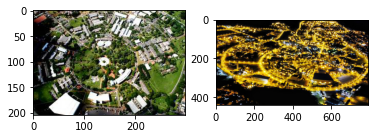

In [ ]:

list_files = os.listdir("./exercises/Ex02_imagens/1")
for i, file in enumerate(list_files):
  print(file)
  plt.subplot(121+i)
  img = mpimg.imread(path+file)
  
  plt.imshow(img)


In [ ]:
# Your code here

### Exercise 2.1.2

Using the same color images as in the previous item, convert to gray levels using one of the methods below:
    - averages of bands R, G, B;
    - weighted average of bands R, G, B: look for the most used power;
    - convert(L) from PIL library;

Then calculate the histogram of the converted image to gray levels. Compare the gray level histograms and discuss the differences again.

In [ ]:
# Your code here

## Part 2 - Extracting attributes derived from the histogram

Histograms can be used to extract attributes from images. This data is useful in machine learning tasks such as image classification.

Among the most common attributes used for image classification are: *mean*, *variance*, *asymmetry* and *kurtosis*.

The function below calculates, given an image, the histogram and its attributes. In addition to the attributes listed above, it also calculates the 1st, 10th, 50th, 90th, 99th and 100% percentiles.


In [ ]:
def histstat(f):
    import numpy as np

    h, bin_edges = np.histogram(f, 256, (0,255))
    hn = 1.0*h/h.sum() # compute the normalized image histogram
    cum_hn = np.cumsum(hn) # compute the cumulative image histogram
    v = np.zeros(9) # number of statistics

    # compute statistics
    n = len(h) # number of gray values
    v[0]  = np.sum((np.arange(n)*hn)) # mean
    v[1]  = np.sum(np.power((np.arange(n)-v[0]),2)*hn) # variance
    v[2]  = np.sum(np.power((np.arange(n)-v[0]),3)*hn)/(np.power(v[1],1.5))# skewness
    v[3]  = np.sum(np.power((np.arange(n)-v[0]),4)*hn)/(np.power(v[1],2))-3# kurtosis
    v[4] = np.where(cum_hn >= 0.01)[0][0] # 1% percentile
    v[5] = np.where(cum_hn >= 0.1)[0][0] # 10% percentile
    v[6] = np.where(cum_hn >= 0.5)[0][0] # 50% percentile
    v[7] = np.where(cum_hn >= 0.9)[0][0] # 90% percentile
    v[8] = np.where(cum_hn >= 0.99)[0][0] # 99% percentile

    return v

If we then want to extract the attributes from the histogram of one of the previous images, just do:

In [ ]:
f = mpimg.imread(path+"unicamp_night.jpg")
f_gray = np.uint8(0.3*f[:,:,0]+0.59*f[:,:,1]+0.11*f[:,:,2])
hist_features = histstat(f_gray)
for feature in hist_features:
  print(f'{feature:.2f}')


74.39
5046.65
0.65
-0.90
0.00
3.00
51.00
184.00
236.00


### Exercise 2.2.1

Now extract the attributes from the second example image and compare them with those from the first image. Do they look different enough to distinguish one from the other?

In [ ]:
# Your code here

## Part 3 - Image classification using attributes derived from the histogram

### Example - The K-Nearest Neighbors classifier (KNN or K-Nearest Neighbors)

[KNN (K-Nearest Neighbors)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) is a classification algorithm that uses an instance-based approach, i.e. it classifies a new sample based on the closest (neighboring) samples to it. KNN is based on the assumption that samples that are close together in the feature space are more likely to belong to the same class.

To classify images using the KNN algorithm, first the training dataset is used to build a representation of the data that allows the search for nearest neighbors.

Then, to classify a new sample, the algorithm finds the K closest samples in the constructed representation, where K is a user-defined parameter.

Finally, the class of the new sample is determined by the most common class among the neighbors found.

### Example of using KNN:

A two-class dataset is randomly generated and then the KNN model is trained with k=5 nearest neighbors. Note that the **KNeighborsClassifier()** function was imported from the **sklearn.neighbors** library and was used to create the KNN model. The *fit()* function was used to train the model

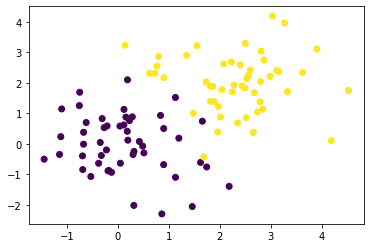

KNeighborsClassifier()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Random data generation
np.random.seed(1)
X1 = np.random.randn(50, 2)  # 50 samples of class 1
X2 = np.random.randn(50, 2) + 2  # 50 samples of class 2
X = np.concatenate((X1, X2))
y = np.concatenate((np.zeros(50), np.ones(50))) # labels classes (0 e 1)

# Viewing the samples (colored by class)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

# Creating  KNN model
model = KNeighborsClassifier(n_neighbors=5)

# Training
model.fit(X, y)


Then, new random samples were created for testing and the model was used to classify them.

The *predict()* function is used to classify new samples.


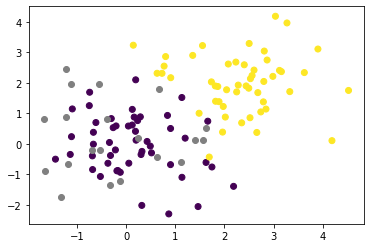

In [ ]:
# Creating new random samples for testing
X_test = np.random.randn(20, 2)

# Viewing the test samples
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(X_test[:,0],X_test[:,1],c='gray')
plt.show()

# Classification
y_pred = model.predict(X_test)



To evaluate the quality of a classifier, the following metrics are typically used:

- [Accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html): measures the proportion of samples correctly classified by the model.
- [Precision (precision_score)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html): measures the proportion of samples classified as positive (1) that are actually positive.
- [Recall (recall_score)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html): measures the proportion of positive samples (1) that are correctly identified by the model.
- [F1-Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) (f1_score): harmonic mean between precision and recall.

Please note: to evaluate the model, metrics were calculated against training samples, which is **not** ideal in a real classification scenario. However, for teaching purposes, these metrics can be used to evaluate the model's performance.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluating model
acc = accuracy_score(y, model.predict(X))
prec = precision_score(y, model.predict(X))
rec = recall_score(y, model.predict(X))
f1 = f1_score(y, model.predict(X))

# Print metrics
print('Accuracy: %.2f' % acc)
print('Precision: %.2f' % prec)
print('Recall: %.2f' % rec)
print('F1-Score: %.2f' % f1)

Acurácia: 0.96
Precisão: 0.94
Recall: 0.98
F1-Score: 0.96


To make a qualitative evaluation of the classifier, we can plot the classification results using matplotlib's [scatter()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) function. Training samples are plotted with circular dots, while testing samples are plotted with crossed dots.

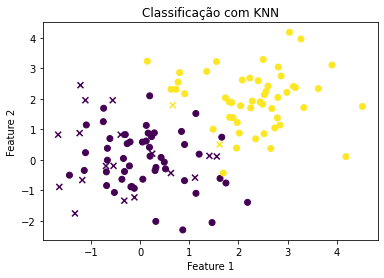

In [ ]:

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', c=y_pred)
plt.title('Classification KNN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Exercise 2.3.1

Let's now use the same KNN classifier to classify images. In this case, instead of using random data for training and testing, we will extract the attributes from the histograms generated by the sets of images used for training and testing. The attributes will be used as input data for the model. Images must be classified into "day" and "night".

The code below creates the training and test sets (images and labels) using the images available in the folder below. For each class (day and night), we divided 5 images for training (images_train and labels_train) and 4 images for testing (images_test and labels_test).

Please note that:
- To create the labels, we use the [split()](https://python-reference.readthedocs.io/en/latest/docs/str/split.html) method in the image name, used as a "_" separator .
- We check the class name and assign an integer value to differentiate each one.

In [ ]:
files = "./exercises/Ex02_imagens/2/"

list_files = os.listdir(files)
all_images = []
all_labels = []
for file in list_files:
  print(file)
  img = mpimg.imread(files+file)
  all_images.append(img)
  if file.split("_")[0]=="day": all_labels.append(0)
  else: all_labels.append(1)

images_train = all_images[0:3]+all_images[11:]
labels_train = all_labels[0:3]+all_labels[11:]
images_test = all_images[3:11]
labels_test = all_labels[3:11]  

#print(f'images_train: \n{images_train}')
print(f'labels_train: \n{labels_train}')
#print(f'images_test: \n{images_test}')
print(f'labels_test: \n{labels_test}')

day_1.jpeg
day_2.jpeg
day_3.jpeg
day_4.jpeg
day_5.jpeg
day_6.jpg
day_7.jpeg
night_1.jpg
night_2.jpg
night_3.jpg
night_4.jpg
night_5.gif
night_6.jpg
night_7.jpg
day_8.jpg
day_9.jpg
night_8.jpg
night_9.jpg
labels_train: 
[0, 0, 0, 1, 1, 1, 0, 0, 1, 1]
labels_test: 
[0, 0, 0, 0, 1, 1, 1, 1]


**a)** Create a function that receives a set of RGB images, transforms the images to *grayscale*, and extracts the histogram attributes of each image. The function must return the attributes of the histograms concatenated into a vector of attributes. Use the **"histstat"** function given in this notebook to extract attributes.

Use the datasets from the previous item to obtain the feature vectors for the training and testing sets (train_features and test_features).

**Attention!** For the training set you must obtain a 10 x 9 matrix, where each line corresponds to a sample (image) and each column corresponds to an attribute of the histogram. Similarly, for the test set you should get an 8 x 9 matrix.

In [ ]:
# Your code here

**b)** Train a kNN model using the created training dataset (train_features). You will need to choose a value of k. Validate the model using the test dataset (test_features). Calculate the classifier evaluation metrics for both datasets (first for training, then for testing): accuracy, precision, recall and F1-score. Print the [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)


In [ ]:
# Your code here

**c)** Try plotting the classification results using attributes 2 by 2 as axes. Use the matplotlib function [scatter()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html), already demonstrated at the beginning of Part 3 of this notebook. Training samples should be plotted with circular dots, while testing samples should be plotted with crossed dots. Comment on the results obtained.

In [ ]:
# Your code here

Comment on the results obtained: are you satisfied with the result? What can you infer from your classifier by looking at the metrics obtained? What is the most frequent error?

### Exercise 2.3.2

Try to improve classification results by changing the extracted attributes. Some suggestions:

- resize the images to a smaller size **(64, 64)**, this can make the attributes less susceptible to noise and details, focusing the classification on more general characteristics;
- in classification problems where we have few samples and many attributes, we have the "evil of dimensionality". To avoid this problem, make a selection of attributes, that is, do not use all the extracted attributes. You can choose the attributes randomly, you can do a statistical analysis of the correlated attributes, you can do a visual analysis. You can also use specific feature selection techniques ([feature selection](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection)).
- change the value of k neighbors;

In [ ]:
# Your code here

# References

- [Image Histogram](https://github.com/lrittner/Computacao-Visual/blob/master/tutoriais/05_Histograma_da_imagem.ipynb)
- [KNN (K-Nearest Neighbors)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [Accuracy (accuracy_score)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
- [Precision (precision_score)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
- [Recall (recall_score)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
- [F1-Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)
- [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
- [Feature selection](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection))
- [split() method](https://python-reference.readthedocs.io/en/latest/docs/str/split.html)
- [scatter() method](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)